In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Dataset cleaning

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [40]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [41]:
df.fillna({'director': 'Unknown Director'}, inplace=True)


In [42]:
df.fillna({'cast': 'Unknown cast'}, inplace=True)

In [43]:
df.fillna({'country': 'Unknown Country'}, inplace=True)

In [44]:
print(df.isnull().sum())

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64


In [45]:
print(f"\nMissing 'date_added' before dropping: {df['date_added'].isnull().sum()} rows")


Missing 'date_added' before dropping: 10 rows


In [46]:
df.dropna(subset=['date_added'], inplace=True)
print(f"Missing 'date_added' after dropping: {df['date_added'].isnull().sum()} rows")

Missing 'date_added' after dropping: 0 rows


In [47]:
df.fillna({'rating': 'Not Rated|'}, inplace=True)

In [48]:
print(f"\nMissing 'duration' before dropping: {df['duration'].isnull().sum()} rows")


Missing 'duration' before dropping: 3 rows


In [49]:
df.dropna(subset=['duration'], inplace=True)
print(f"Missing 'duration' after dropping: {df['duration'].isnull().sum()} rows")

Missing 'duration' after dropping: 0 rows


In [80]:
print(f"\nNumber of duplicates: {df.duplicated().sum()}")


Number of duplicates: 0


In [83]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [84]:
df['year_added'] = df['date_added'].dt.year

In [85]:
print(f"NaT values in 'date_added' after conversion: {df['date_added'].isnull().sum()}")

NaT values in 'date_added' after conversion: 88


In [87]:
df.dropna(subset=['date_added'], inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8706 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8706 non-null   object        
 1   type          8706 non-null   object        
 2   title         8706 non-null   object        
 3   director      8706 non-null   object        
 4   cast          8706 non-null   object        
 5   country       8706 non-null   object        
 6   date_added    8706 non-null   datetime64[ns]
 7   release_year  8706 non-null   int64         
 8   rating        8706 non-null   object        
 9   duration      8706 non-null   object        
 10  listed_in     8706 non-null   object        
 11  description   8706 non-null   object        
 12  year_added    8706 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 952.2+ KB


In [88]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64


# Analyzing

### 1. Number of Movies vs TV Shows

In [67]:
content_type_counts = df['type'].value_counts()
print(content_type_counts)

type
Movie      6128
TV Show    2666
Name: count, dtype: int64


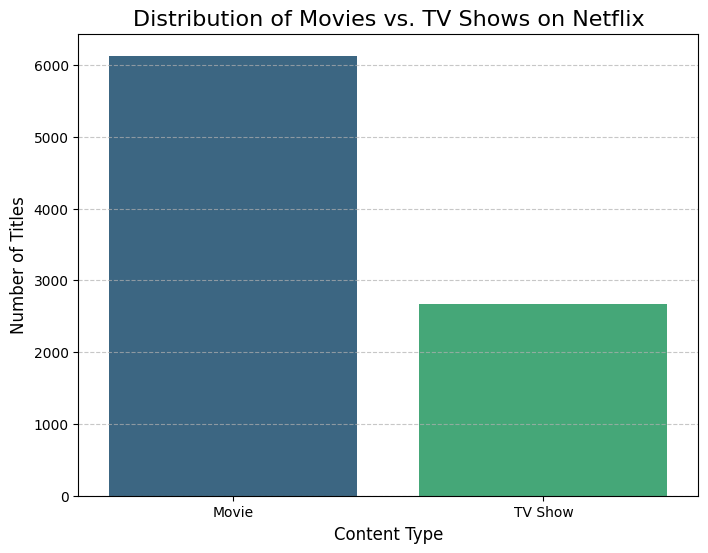

In [71]:
df_counts = content_type_counts.reset_index()
df_counts.columns = ['Content_Type', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(data=df_counts, x='Content_Type', y='Count', hue='Content_Type', dodge=False, palette='viridis', legend=False)
plt.title('Distribution of Movies vs. TV Shows on Netflix', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###2.Most Common Genres

In [72]:
all_genres = df['listed_in'].str.split(', ').explode()
genre_counts = all_genres.value_counts().head(10)
print("\nTop 10 genres:")
print(genre_counts)


Top 10 genres:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


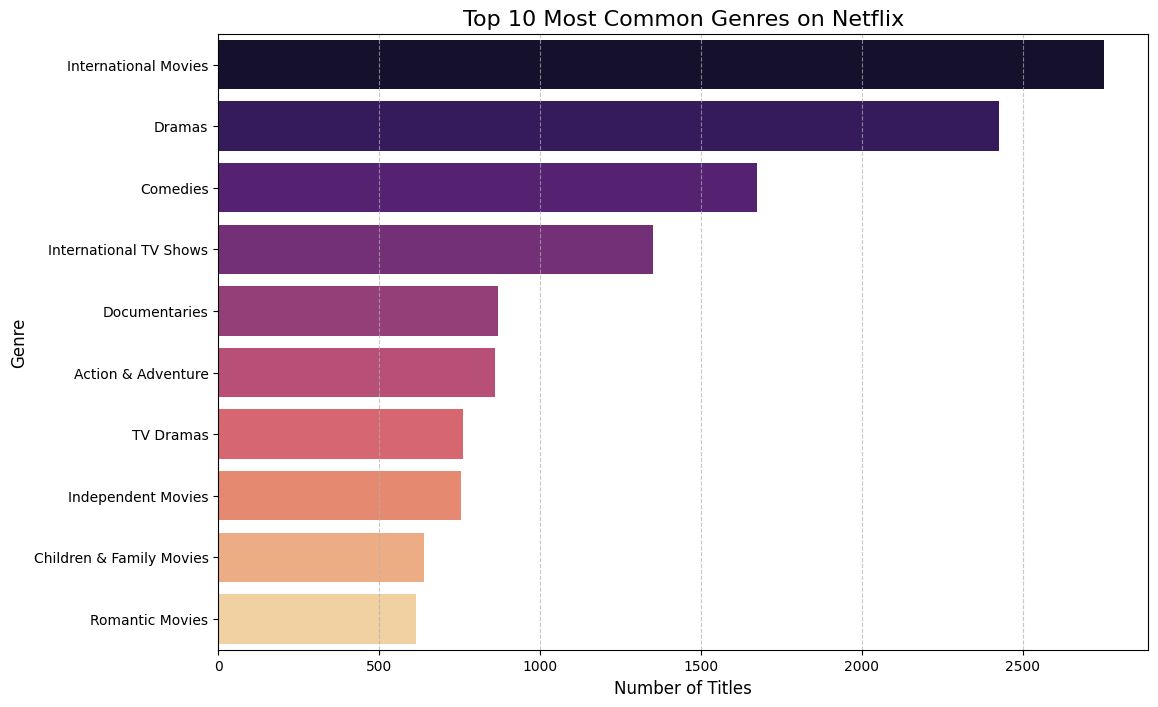

In [78]:
df_genres = genre_counts.head(10).reset_index()
df_genres.columns = ['Genre', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(data=df_genres, x='Count', y='Genre', hue='Genre', dodge=False, palette='magma', legend=False)
plt.title('Top 10 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


###3. Content Trends by Year

In [ ]:
# Count titles added per year

In [91]:
yearly_added_counts = df['year_added'].value_counts().sort_index()


In [93]:
print("\n---  Content Trends by Year (Added to Netflix) ---")
print(yearly_added_counts.tail(10)) # Show last 10 years for recent trends


---  Content Trends by Year (Added to Netflix) ---
year_added
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     416
2017.0    1163
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


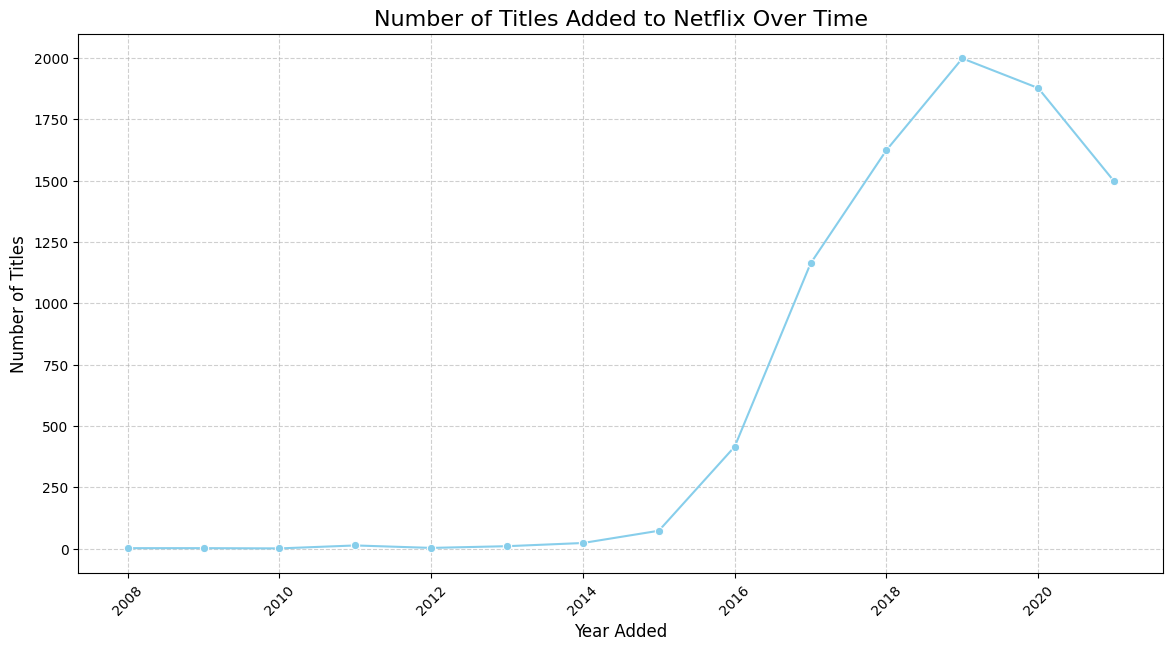

In [94]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_added_counts.index, y=yearly_added_counts.values, marker='o', color='skyblue')
plt.title('Number of Titles Added to Netflix Over Time', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Trend by 'release_year' (original release year of the content)

In [96]:
release_year_counts = df['release_year'].value_counts().sort_index()

In [97]:
current_year = pd.Timestamp.now().year
release_year_counts = release_year_counts[release_year_counts.index <= current_year]

In [99]:
print("\n--- . Content Trends by Year (Original Release Year) ---")
print(release_year_counts.tail(10)) # Show last 10 years for recent trends



--- . Content Trends by Year (Original Release Year) ---
release_year
2012     229
2013     282
2014     343
2015     548
2016     878
2017    1015
2018    1140
2019    1030
2020     953
2021     592
Name: count, dtype: int64


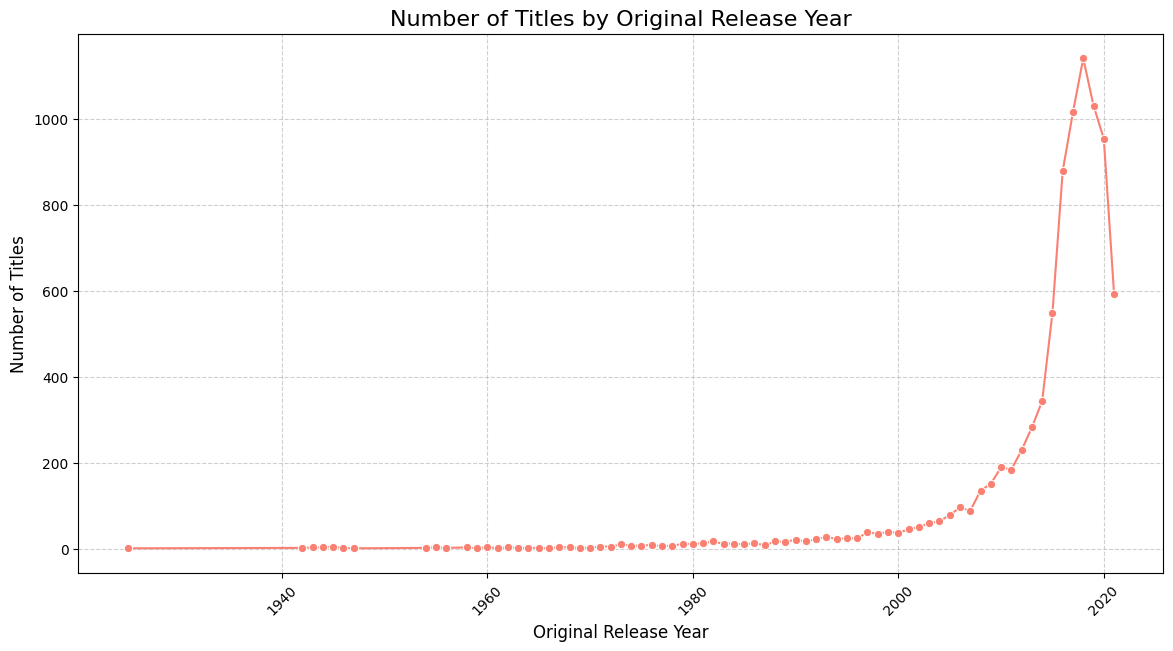

In [101]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values, marker='o', color='salmon')
plt.title('Number of Titles by Original Release Year', fontsize=16)
plt.xlabel('Original Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##4.Which Countries Produce the Most Content

In [102]:
all_countries = df['country'].str.split(', ').explode()
country_counts = all_countries.value_counts().head(10)

In [103]:
print("\nTop 10 content-producing countries:")
print(country_counts)


Top 10 content-producing countries:
country
United States      3639
India              1045
Unknown Country     827
United Kingdom      785
Canada              432
France              389
Japan               314
Spain               228
South Korea         226
Germany             225
Name: count, dtype: int64


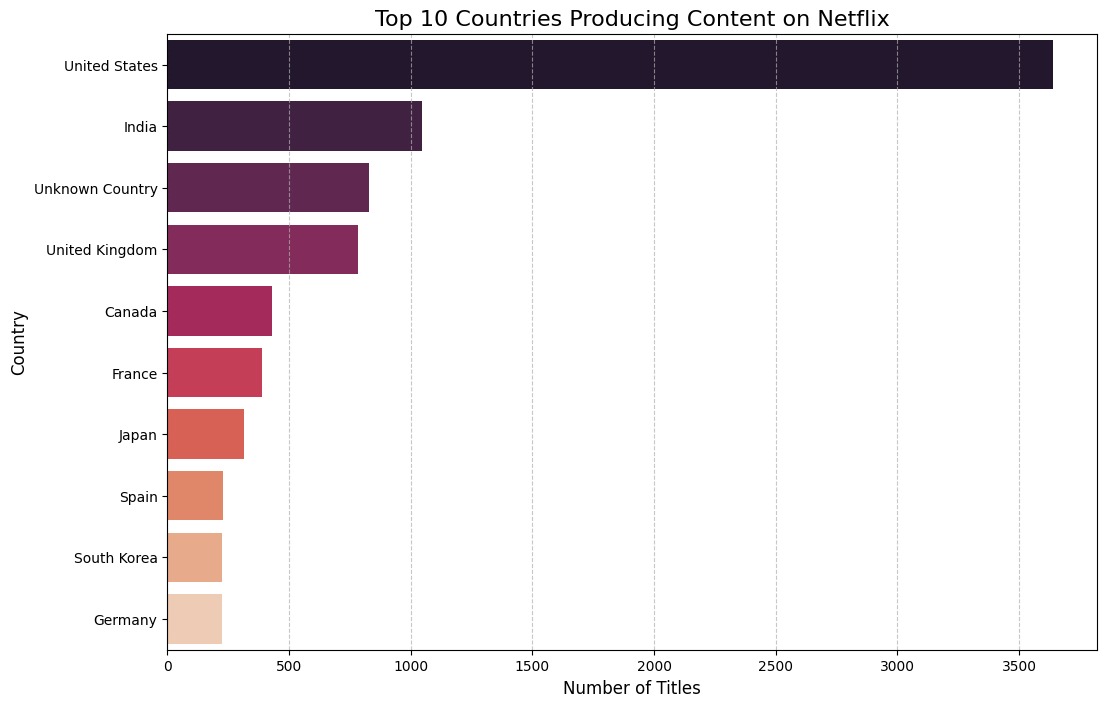

In [105]:
df_countries = country_counts.head(10).reset_index()
df_countries.columns = ['Country', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(data=df_countries, x='Count', y='Country', hue='Country', dodge=False, palette='rocket', legend=False)
plt.title('Top 10 Countries Producing Content on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tick_params(labelsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()